In this notebook we try to gain intuition on which nodes of a graph are the hardest to resolve when randomly searching for resolving sets.

In [1]:
import networkx as nx
from tqdm import tqdm
import sys
sys.path.append('../')
from helpers import *
import matplotlib.pyplot as plt
import random

## Copenhagen calls graph

In [2]:
# read the file and create a graph
G_calls = nx.read_edgelist('Copenhagen graphs/calls.csv/edges.csv', delimiter=',', data=(('timestamp', int),('duration', int)))

# print the number of nodes and edges
print('Number of nodes:', G_calls.number_of_nodes())
print('Number of edges:', G_calls.number_of_edges())

positions_calls = {}
i = 0
with open('Copenhagen graphs/calls.csv/nodes.csv', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        _, pos,_ = line.strip().split('"')
        pos = np.array([float(coord) for coord in pos.strip('array([])').split(',')])
        positions_calls[str(i)] = pos
        i += 1

Number of nodes: 536
Number of edges: 621


In [3]:
# Test if the graph is connected
nx.is_connected(G_calls)

False

In [4]:
# Remove the small components such that the graph becomes connected
connected_components = nx.connected_components(G_calls)
biggest = max(connected_components, key=len)
G_calls = G_calls.subgraph(biggest)
nx.is_connected(G_calls)

True

#### Plot the nodes and their likelihood to be resolved

In [5]:
nb_of_nodes_in_resolving_set = 30

In [6]:
# We use the random strategy

length = dict(nx.all_pairs_shortest_path_length(G_calls))

intensities = {str(key): 0 for key in G_calls.nodes}

for i in range(100):
    # Random set of nodes to test
    nodes = set(random.sample(list(G_calls.nodes), nb_of_nodes_in_resolving_set))
    resolved = set_resolved(G_calls, nodes, length)
    for node in resolved:
        intensities[node] += +1

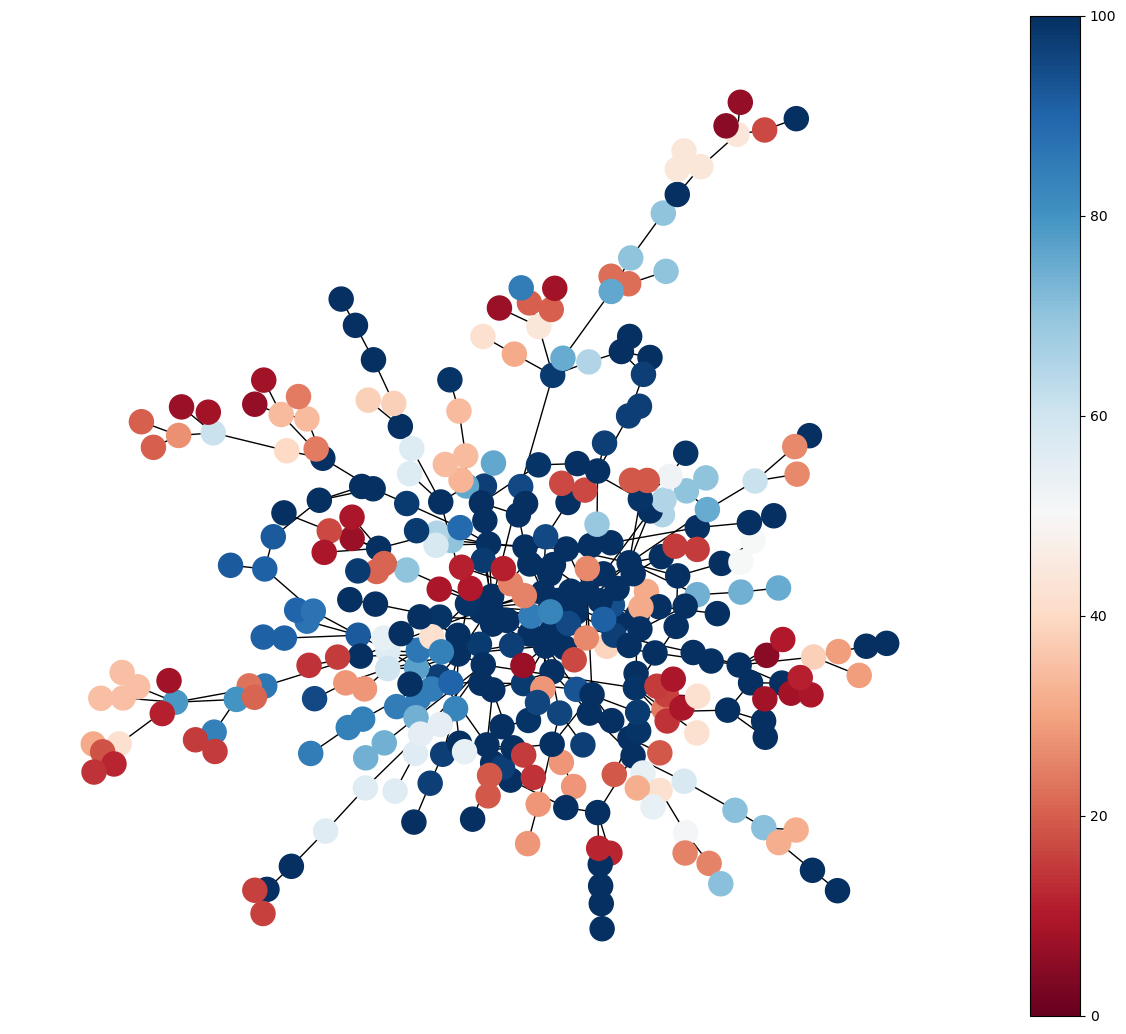

In [7]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_calls.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_calls, positions_calls, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [8]:
# We use the degree centrality strategy

length = dict(nx.all_pairs_shortest_path_length(G_calls))

c = nx.degree_centrality(G_calls)

intensities = {str(key): 0 for key in G_calls.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = set(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_calls, nodes, length)
    for node in resolved:
        intensities[node] += +1

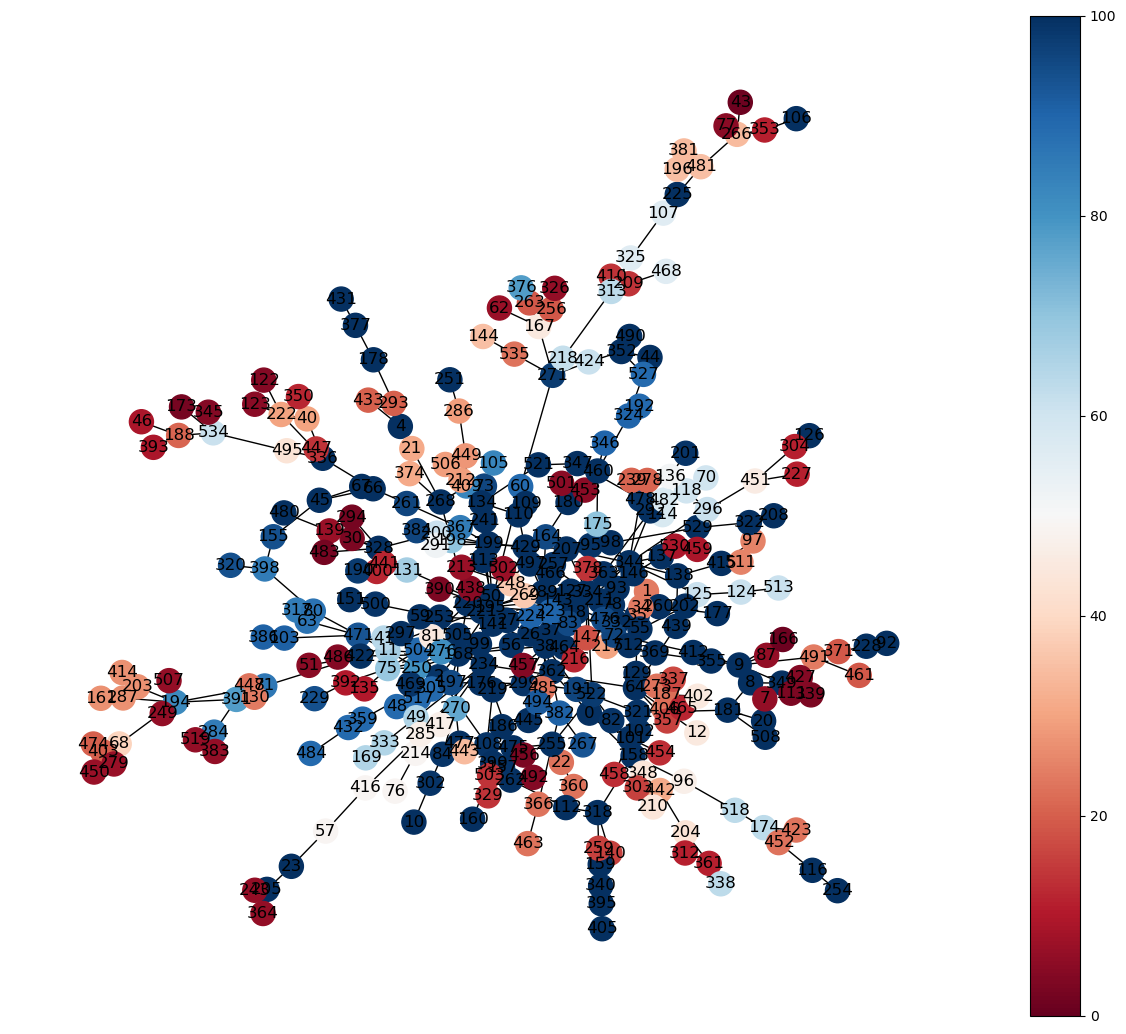

In [9]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_calls.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_calls, positions_calls, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [10]:
# We increase the likelihood that nodes with small degree are added to the resolving set

length = dict(nx.all_pairs_shortest_path_length(G_calls))

c = nx.degree_centrality(G_calls)
a = list(set(c.values()))
a.sort()
c = {key: 1000*max(c.values()) if value in a[:3] else value for key, value in c.items()}

intensities = {str(key): 0 for key in G_calls.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = set(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_calls, nodes, length)
    for node in resolved:
        intensities[node] += +1

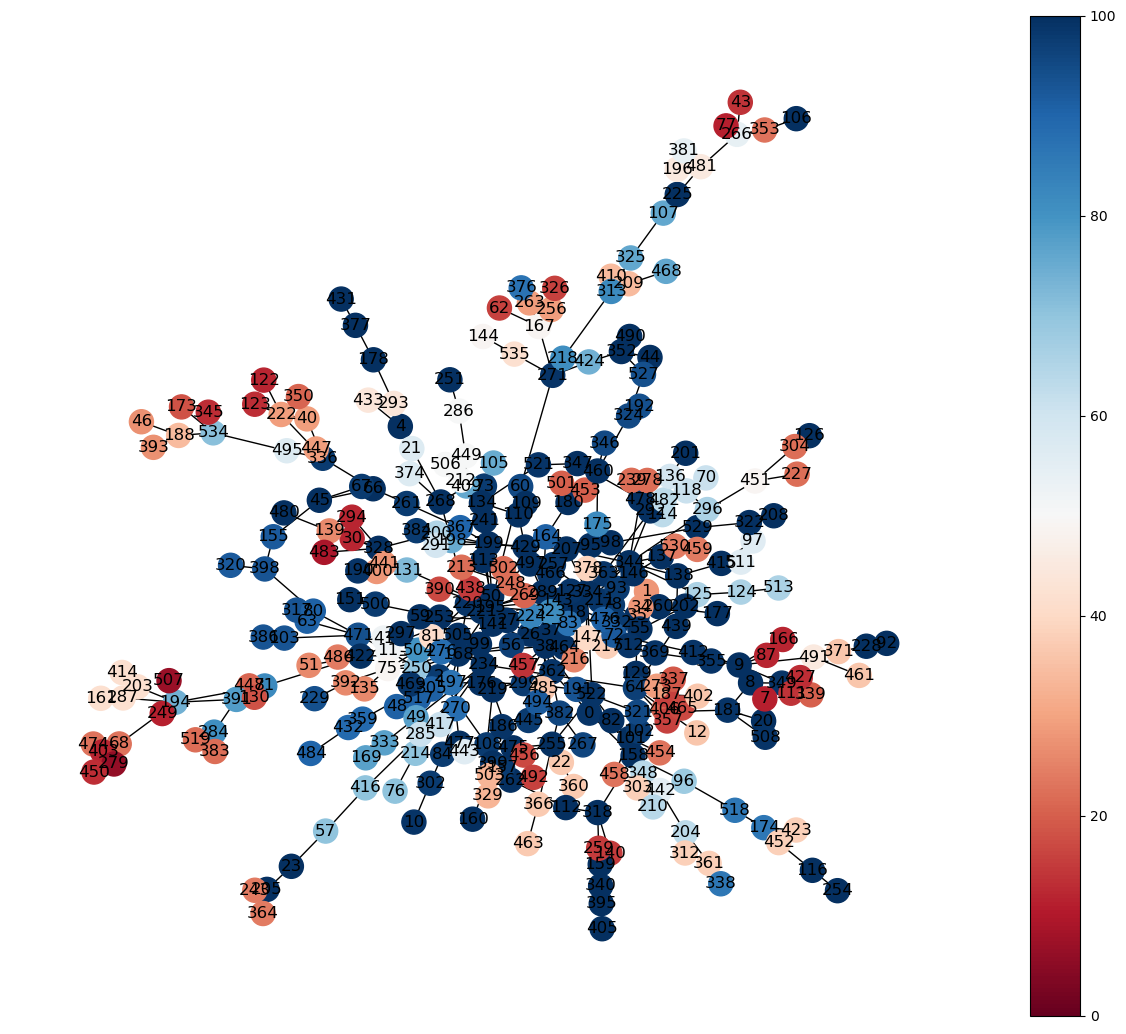

In [11]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_calls.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_calls, positions_calls, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [12]:
# Here we add to the resolving set the nodes that were the least resolved when drawing random subsets 
# based on the betweenness centrality.

length = dict(nx.all_pairs_shortest_path_length(G_calls))

c = nx.betweenness_centrality(G_calls)
a = list(set(c.values()))
a.sort()
c = {key: 1000*max(c.values()) if value in a[:1] else value for key, value in c.items()}

intensities = {str(key): 0 for key in G_calls.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = set(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_calls, nodes, length)
    for node in resolved:
        intensities[node] += +1
        
nodes_to_add = [key for key, val in intensities.items() if val < 40]
length = dict(nx.all_pairs_shortest_path_length(G_calls))

c = nx.betweenness_centrality(G_calls)
a = list(set(c.values()))
a.sort()
c = {key: 1000*max(c.values()) if value in a[:1] else value for key, value in c.items()}

intensities = {str(key): 0 for key in G_calls.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = nodes_to_add + list(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_calls, nodes, length)
    for node in resolved:
        intensities[node] += +1

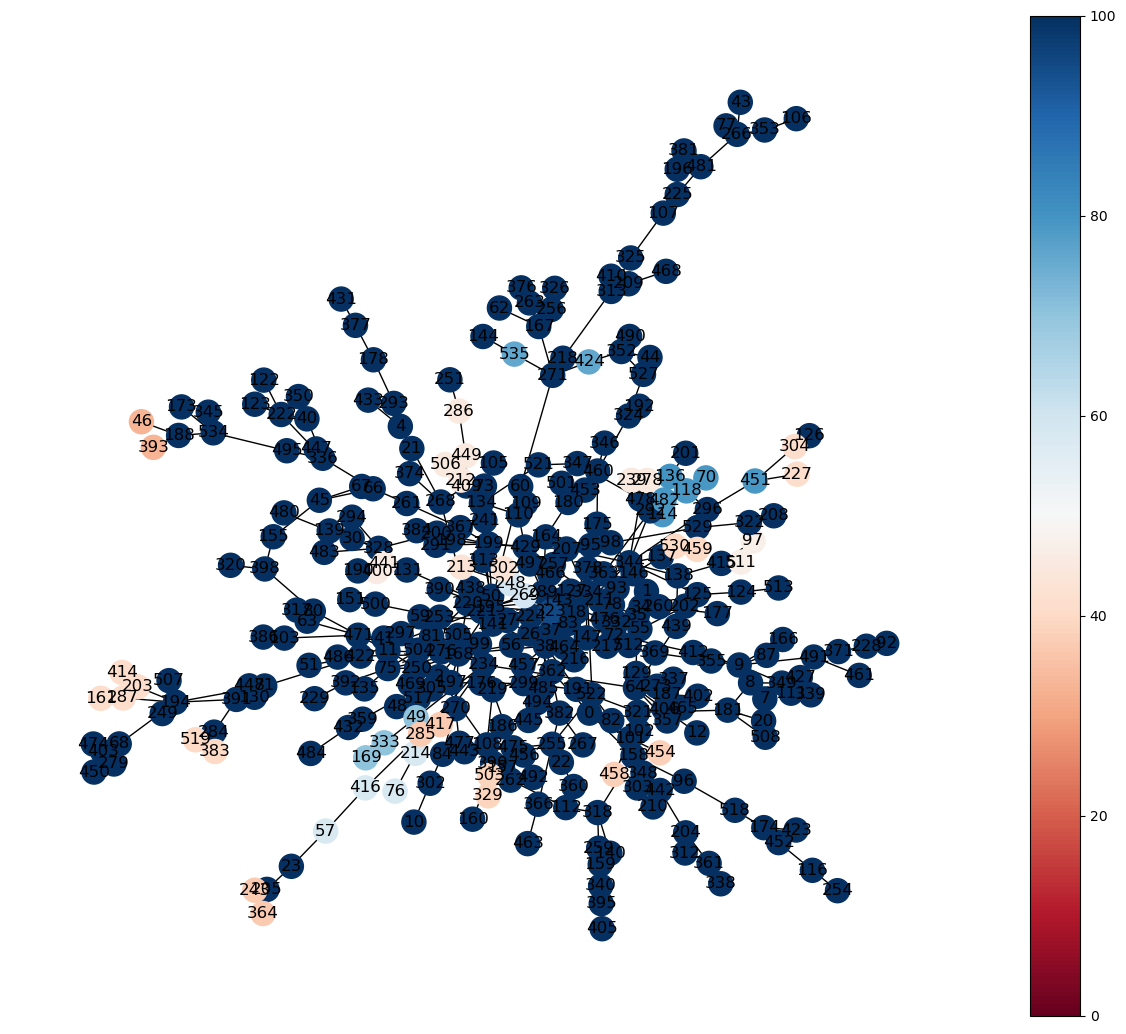

In [13]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_calls.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_calls, positions_calls, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

## Copenhagen fb_friends graph

In [14]:
# Read the file and create a graph
G_fb = nx.read_edgelist('Copenhagen graphs/fb_friends.csv/edges.csv', delimiter=',')

# print the number of nodes and edges
print('Number of nodes:', G_fb.number_of_nodes())
print('Number of edges:', G_fb.number_of_edges())

positions_fb = {}
i = 0
with open('Copenhagen graphs/fb_friends.csv/nodes.csv', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        _, pos,_ = line.strip().split('"')
        pos = np.array([float(coord) for coord in pos.strip('array([])').split(',')])
        positions_fb[str(i)] = pos
        i += 1

Number of nodes: 800
Number of edges: 6429


In [15]:
# Test if the graph is connected
nx.is_connected(G_fb)

True

#### Plot the nodes and their likelihood to be resolved

In [16]:
nb_of_nodes_in_resolving_set = 20

In [17]:
# We use the random strategy

length = dict(nx.all_pairs_shortest_path_length(G_fb))

intensities = {str(key): 0 for key in G_fb.nodes}

for i in range(100):
    # Random set of nodes to test
    nodes = set(random.sample(list(G_fb.nodes), nb_of_nodes_in_resolving_set))
    resolved = set_resolved(G_fb, nodes, length)
    for node in resolved:
        intensities[node] += +1

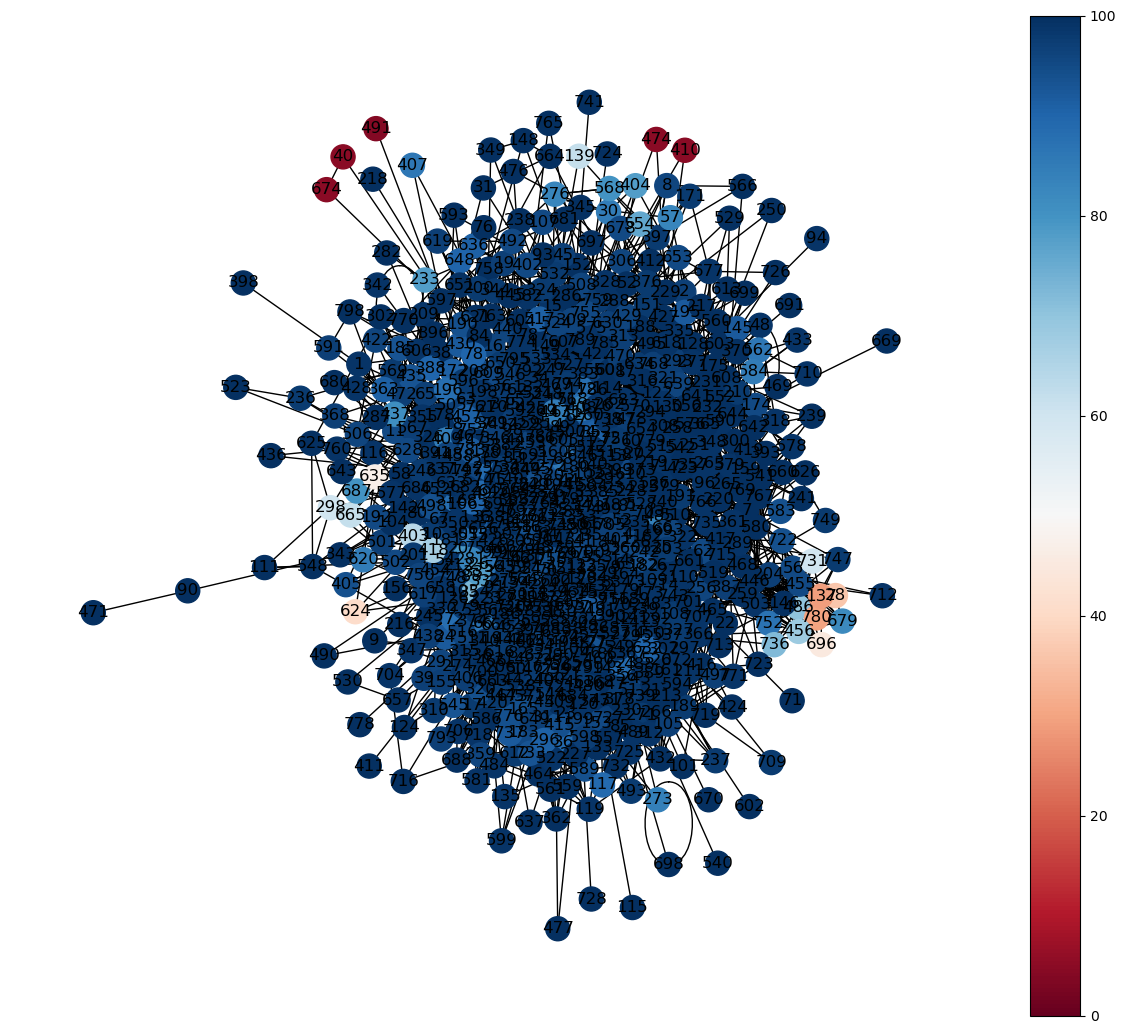

In [18]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_fb.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_fb, positions_fb, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [19]:
# We use the degree centrality strategy

length = dict(nx.all_pairs_shortest_path_length(G_fb))

c = nx.degree_centrality(G_fb)

intensities = {str(key): 0 for key in G_fb.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = list(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_fb, nodes, length)
    for node in resolved:
        intensities[node] += +1

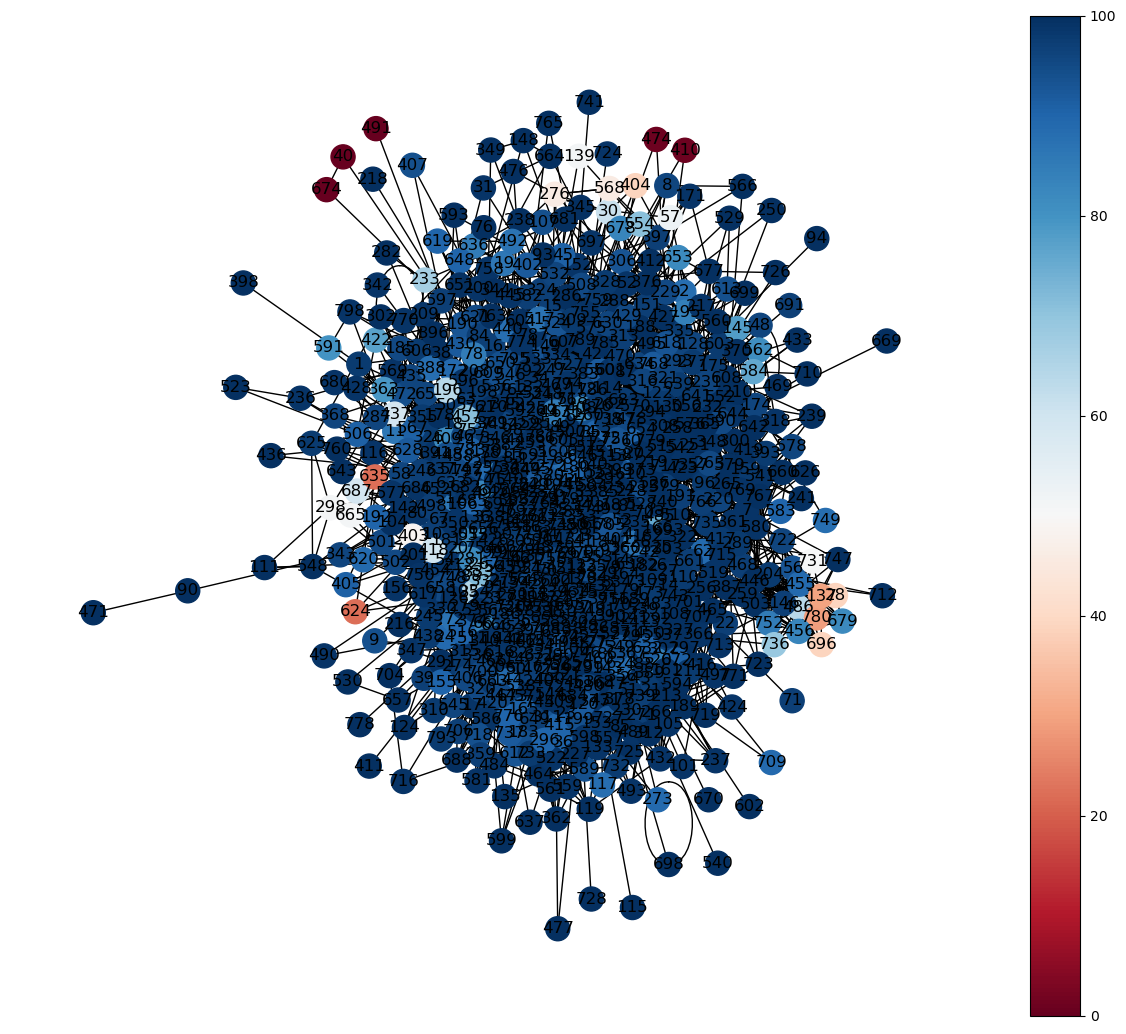

In [20]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_fb.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_fb, positions_fb, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [21]:
# We increase the likelihood that nodes with small degree are added to the resolving set

length = dict(nx.all_pairs_shortest_path_length(G_fb))

c = nx.degree_centrality(G_fb)
a = list(set(c.values()))
a.sort()
c = {key: 1000*max(c.values()) if value in a[:2] else value for key, value in c.items()}

intensities = {str(key): 0 for key in G_fb.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = set(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_fb, nodes, length)
    for node in resolved:
        intensities[node] += +1

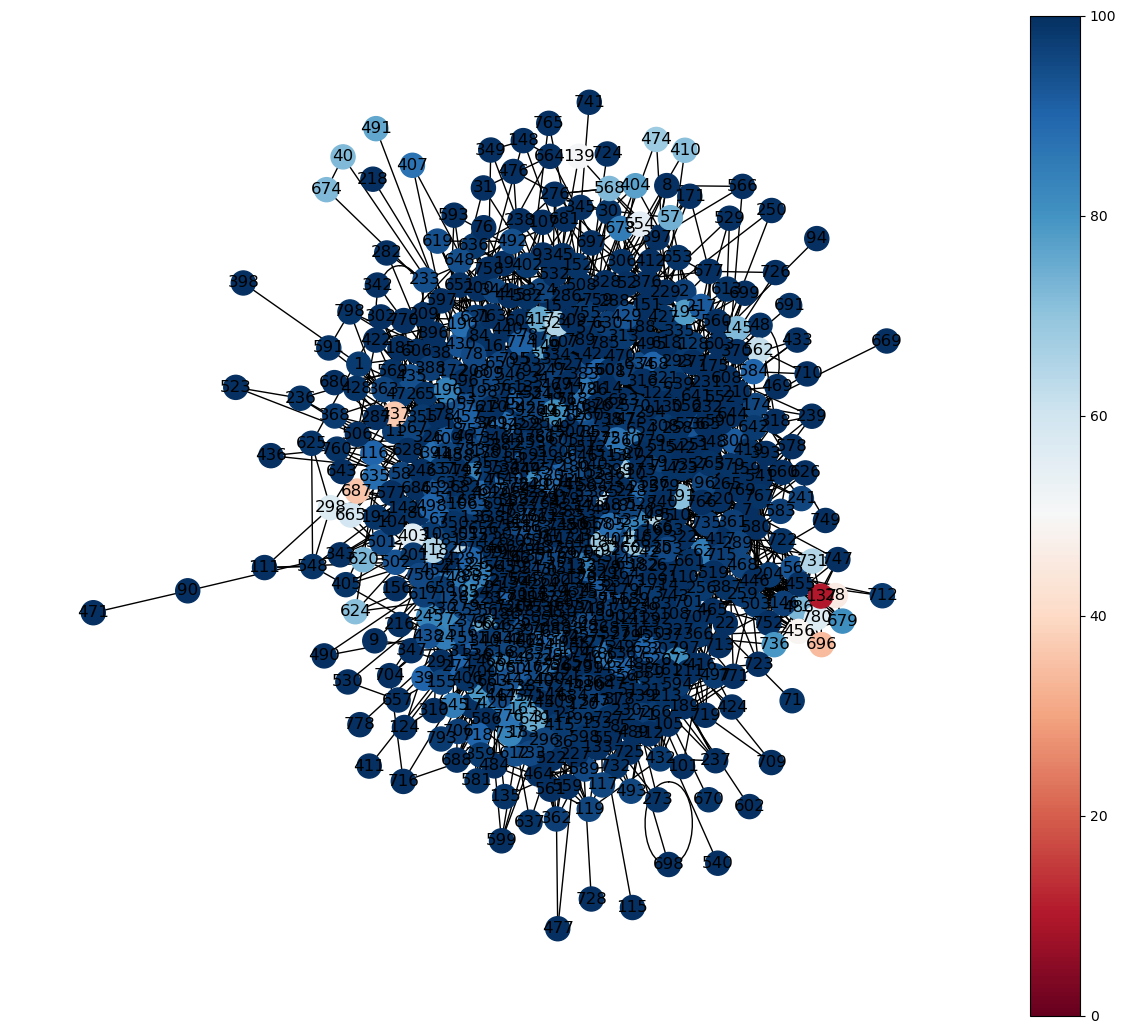

In [22]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_fb.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_fb, positions_fb, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()

In [23]:
# Here we add to the resolving set the nodes that were the least resolved when drawing random subsets 
# based on the degree centrality.

nb_of_nodes_in_resolving_set = 20

length = dict(nx.all_pairs_shortest_path_length(G_fb))

c = nx.degree_centrality(G_fb)

intensities = {str(key): 0 for key in G_fb.nodes}

# normalize the centrality
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = set(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_fb, nodes, length)
    for node in resolved:
        intensities[node] += +1
        

small = [key for key, val in intensities.items() if val < 40]
nodes_to_add = get_nodes_with_diff_neighbors(G_fb, small)
print(len(nodes_to_add))
length = dict(nx.all_pairs_shortest_path_length(G_fb))

c = nx.degree_centrality(G_fb)
intensities = {str(key): 0 for key in G_fb.nodes}

# normalize the betweenness centralities
c_values = np.array(list(c.values()))
c_norm = c_values / sum(c_values)
node_list = list(c.keys())
for i in range(100):
    # Random set of nodes to test
    nodes = nodes_to_add + list(np.random.choice(node_list, p=c_norm, size=nb_of_nodes_in_resolving_set, replace=False))
    resolved = set_resolved(G_fb, nodes, length)
    for node in resolved:
        intensities[node] += +1

4


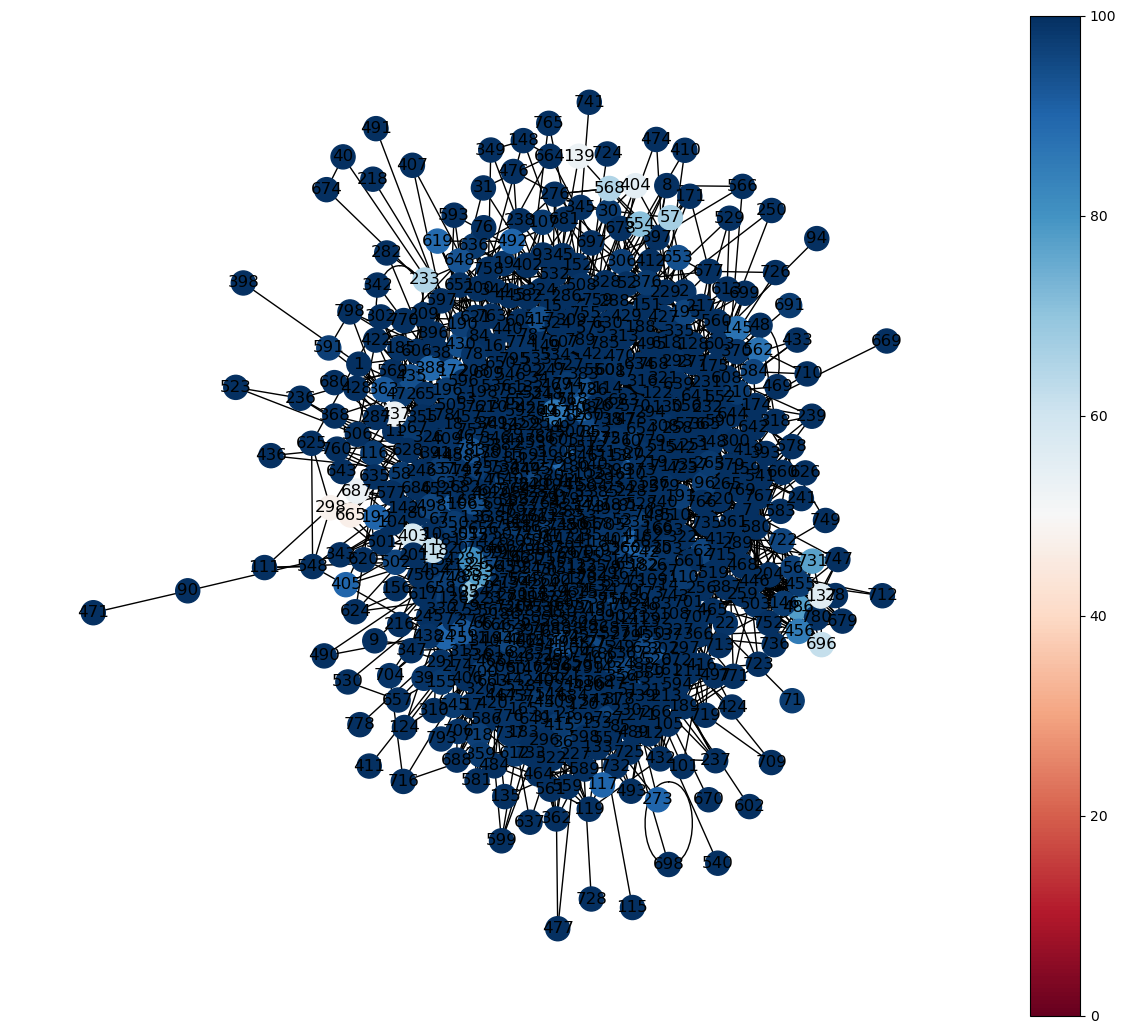

In [24]:
# Set up a color map and normalize intensities
cmap = plt.cm.RdBu
norm = plt.Normalize(0, 100)

# Create a list of colors based on intensities
node_colors = [cmap(norm(intensities[node])) for node in G_fb.nodes]

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(G_fb, positions_fb, with_labels=True, node_color=node_colors, edge_color='black')

# Create a color bar for the intensities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()